In [31]:
import pandas as pd
import numpy as np

In [32]:
data=pd.read_csv('real_estate_price_size.csv')

In [33]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [34]:
data.shape

(100, 2)

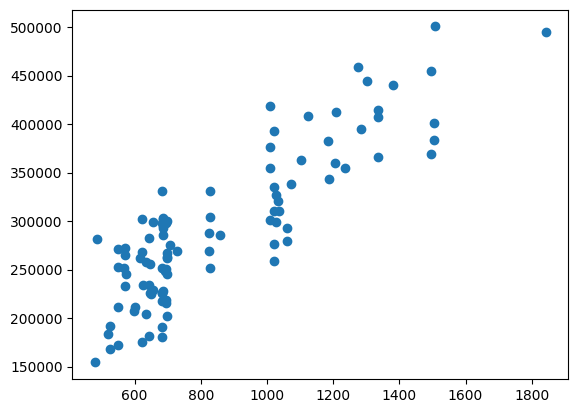

In [35]:
import matplotlib.pyplot as plt
plt.scatter(data['size'],data['price'])

In [36]:
data.info

<bound method DataFrame.info of          price     size
0   234314.144   643.09
1   228581.528   656.22
2   281626.336   487.29
3   401255.608  1504.75
4   458674.256  1275.46
..         ...      ...
95  252460.400   549.80
96  310522.592  1037.44
97  383635.568  1504.75
98  225145.248   648.29
99  274922.856   705.29

[100 rows x 2 columns]>

In [37]:
data.isna().sum()

,0
price,0
size,0


In [38]:
x=data[['size']]
y=data[['price']]

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [57]:
print("coefficient:",model.coef_)
print("intercept:",model.intercept_)

coefficient: [[226.03832641]]
intercept: [98321.97351249]


In [46]:
ypred=model.predict(xtest)

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
r2_score=r2_score(ytest,ypred)
rmse=np.sqrt(mean_squared_error(ytest,ypred))
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2 SCORE:",r2_score)

MAE: 33389.26580454338
MSE: 1597769971.9309876
RMSE: 39972.11492942283
R2 SCORE: 0.6938430573693037


In [58]:
model.predict([[2000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[550398.6263424]])

Text(0, 0.5, 'price')

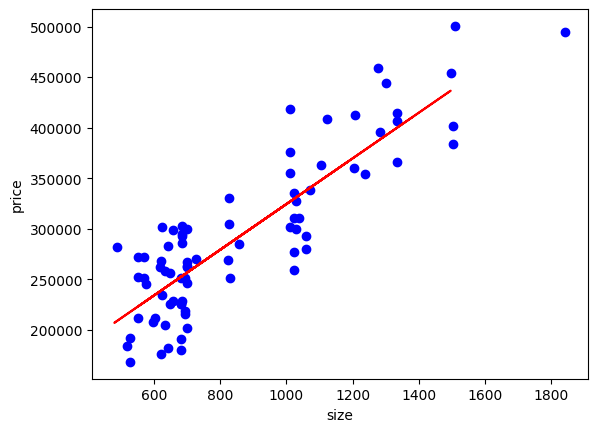

In [56]:
import matplotlib.pyplot as plt
plt.scatter(xtrain,ytrain,color='blue')
plt.plot(xtest,ypred,color='red')
plt.xlabel('size')
plt.ylabel('price')